<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_3_2)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/multiplication_pattern/multiplication_delta_-3.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-3.2_n20.csv',
 'data_multi_delta_-3.2_n30.csv',
 'data_multi_delta_-3.2_n60.csv',
 'data_multi_delta_-3.2_n120.csv',
 'data_multi_delta_-3.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.2_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,85.435084,59.197102,56.841571,4.956951e-07,211.473758,211.473754,3.348320e-06
1,0.0,1.0,29.595926,85.955689,39.411768,-3.428337e-07,164.963383,164.963384,-1.360239e-06
2,0.0,2.0,54.992034,54.376991,90.737216,6.846039e-07,210.106242,210.106238,3.694755e-06
3,0.0,3.0,45.611256,87.578401,21.793315,-1.067234e-06,164.982971,164.982973,-2.013593e-06
4,0.0,4.0,49.777853,82.038017,85.463142,-5.301539e-07,227.279012,227.279014,-2.180833e-06
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,26.824159,71.107312,38.362490,-9.243335e-07,146.293960,146.293961,-8.986516e-07
59996,999.0,56.0,57.087234,69.904032,43.997655,-5.404300e-07,180.988920,180.988918,1.874253e-06
59997,999.0,57.0,59.423662,35.946445,86.254076,1.004563e-05,191.624194,191.624179,1.509309e-05
59998,999.0,58.0,22.676000,60.370528,32.761278,1.048497e-06,125.807807,125.807803,3.490972e-06


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,85.435084,59.197102,56.841571,4.956951e-07,211.473758,211.473754,3.348320e-06
1,0.0,1.0,29.595926,85.955689,39.411768,-3.428337e-07,164.963383,164.963384,-1.360239e-06
2,0.0,2.0,54.992034,54.376991,90.737216,6.846039e-07,210.106242,210.106238,3.694755e-06
3,0.0,3.0,45.611256,87.578401,21.793315,-1.067234e-06,164.982971,164.982973,-2.013593e-06
4,0.0,4.0,49.777853,82.038017,85.463142,-5.301539e-07,227.279012,227.279014,-2.180833e-06
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,26.824159,71.107312,38.362490,-9.243335e-07,146.293960,146.293961,-8.986516e-07
59996,999.0,56.0,57.087234,69.904032,43.997655,-5.404300e-07,180.988920,180.988918,1.874253e-06
59997,999.0,57.0,59.423662,35.946445,86.254076,1.004563e-05,191.624194,191.624179,1.509309e-05
59998,999.0,58.0,22.676000,60.370528,32.761278,1.048497e-06,125.807807,125.807803,3.490972e-06


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    85.435084  59.197102  ...  211.473754  3.348320e-06
      1.0    29.595926  85.955689  ...  164.963384 -1.360239e-06
      2.0    54.992034  54.376991  ...  210.106238  3.694755e-06
      3.0    45.611256  87.578401  ...  164.982973 -2.013593e-06
      4.0    49.777853  82.038017  ...  227.279014 -2.180833e-06
...                ...        ...  ...         ...           ...
999.0 55.0   26.824159  71.107312  ...  146.293961 -8.986516e-07
      56.0   57.087234  69.904032  ...  180.988918  1.874253e-06
      57.0   59.423662  35.946445  ...  191.624179  1.509309e-05
      58.0   22.676000  60.370528  ...  125.807803  3.490972e-06
      59.0   27.676171  77.010825  ...  202.869768 -6.647353e-06

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    85.435084  59.197102  ...  211.473754  3.348320e-06
      1.0    29.595926  85.955689  ...  164.963384 -1.360239e-06
      2.0    54.992034  54.376991  ...  210.106238  3.694755e-06
      3.0    45.611256  87.578401  ...  164.982973 -2.013593e-06
      4.0    49.777853  82.038017  ...  227.279014 -2.180833e-06
...                ...        ...  ...         ...           ...
999.0 55.0   26.824159  71.107312  ...  146.293961 -8.986516e-07
      56.0   57.087234  69.904032  ...  180.988918  1.874253e-06
      57.0   59.423662  35.946445  ...  191.624179  1.509309e-05
      58.0   22.676000  60.370528  ...  125.807803  3.490972e-06
      59.0   27.676171  77.010825  ...  202.869768 -6.647353e-06

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,85.435084,59.197102,56.841571,4.956951e-07,211.473758,211.473754,3.348320e-06
1,0.0,1.0,29.595926,85.955689,39.411768,-3.428337e-07,164.963383,164.963384,-1.360239e-06
2,0.0,2.0,54.992034,54.376991,90.737216,6.846039e-07,210.106242,210.106238,3.694755e-06
3,0.0,3.0,45.611256,87.578401,21.793315,-1.067234e-06,164.982971,164.982973,-2.013593e-06
4,0.0,4.0,49.777853,82.038017,85.463142,-5.301539e-07,227.279012,227.279014,-2.180833e-06
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,26.824159,71.107312,38.362490,-9.243335e-07,146.293960,146.293961,-8.986516e-07
59996,999.0,56.0,57.087234,69.904032,43.997655,-5.404300e-07,180.988920,180.988918,1.874253e-06
59997,999.0,57.0,59.423662,35.946445,86.254076,1.004563e-05,191.624194,191.624179,1.509309e-05
59998,999.0,58.0,22.676000,60.370528,32.761278,1.048497e-06,125.807807,125.807803,3.490972e-06


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    85.435084  59.197102  ...  211.473754  3.348320e-06
      1.0    29.595926  85.955689  ...  164.963384 -1.360239e-06
      2.0    54.992034  54.376991  ...  210.106238  3.694755e-06
      3.0    45.611256  87.578401  ...  164.982973 -2.013593e-06
      4.0    49.777853  82.038017  ...  227.279014 -2.180833e-06
...                ...        ...  ...         ...           ...
999.0 55.0   26.824159  71.107312  ...  146.293961 -8.986516e-07
      56.0   57.087234  69.904032  ...  180.988918  1.874253e-06
      57.0   59.423662  35.946445  ...  191.624179  1.509309e-05
      58.0   22.676000  60.370528  ...  125.807803  3.490972e-06
      59.0   27.676171  77.010825  ...  202.869768 -6.647353e-06

[60000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]

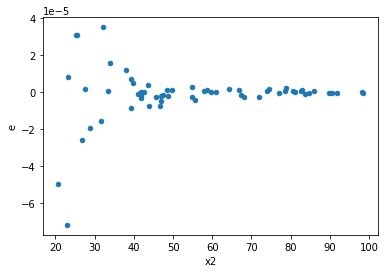

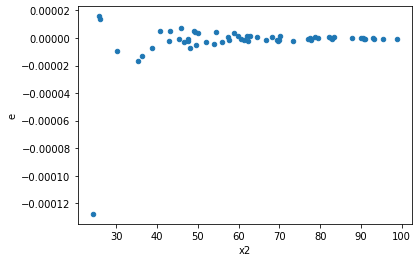

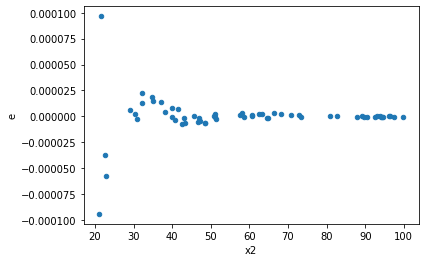

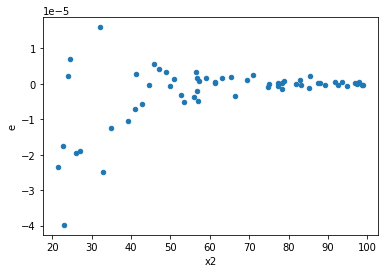

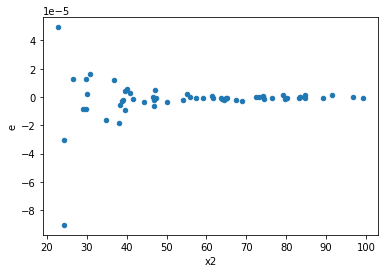

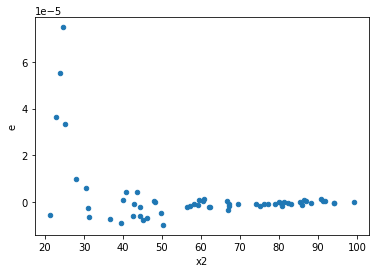

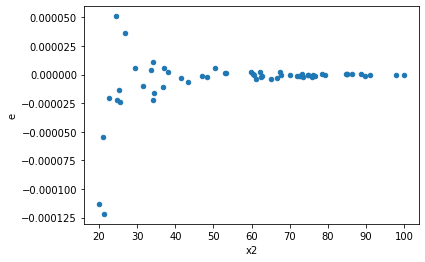

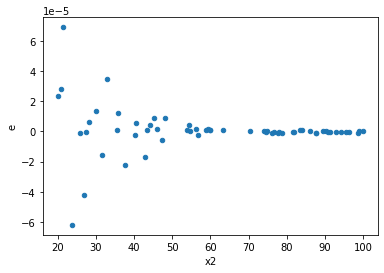

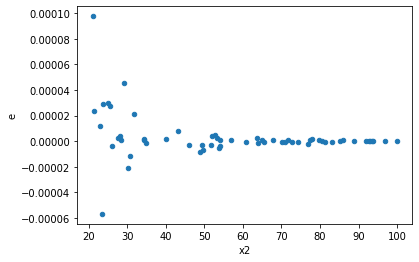

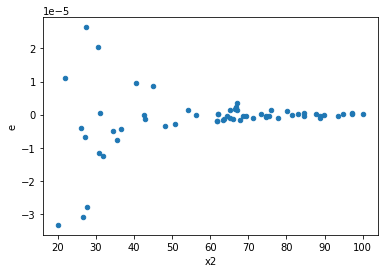

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,8.615855676278202e-12,7.040571196299965e-09,4.307927838139101e-13,3.5202855981499823e-10,0.0012237438463524235,9.286647129341985e-26,Reject005=0 : Heteroscedasticity
1.0,21.0,21.0,3.4976418655692523e-12,1.4489878529575666e-08,1.7488209327846263e-13,7.244939264787833e-10,0.0002413851750675566,3.747516464560544e-33,Reject005=0 : Heteroscedasticity
2.0,21.0,21.0,1.2680618073460298e-11,8.05864174725015e-09,6.340309036730149e-13,4.0293208736250745e-10,0.0015735428464464629,1.2924834984385904e-24,Reject005=0 : Heteroscedasticity
3.0,21.0,21.0,1.2708801938239785e-11,1.1568506133457721e-08,6.354400969119892e-13,5.78425306672886e-10,0.0010985689761173372,2.9980336247720663e-26,Reject005=0 : Heteroscedasticity
4.0,21.0,21.0,1.6544100077443463e-11,1.0095420872323618e-08,8.272050038721732e-13,5.047710436161809e-10,0.0016387726957277,1.9774444681736265e-24,Reject005=0 : Heteroscedasticity
5.0,21.0,21.0,8.610938271877134e-12,2.983568479641311e-09,4.305469135938567e-13,1.4917842398206555e-10,0.002886120540096453,7.355256240557324e-22,Reject005=0 : Heteroscedasticity
6.0,21.0,21.0,1.300100819383716e-11,1.4693471391673422e-09,6.50050409691858e-13,7.346735695836711e-11,0.008848152929473592,8.431609119154368e-17,Reject005=0 : Heteroscedasticity
7.0,21.0,21.0,1.1479590346684792e-11,3.4118373162529472e-09,5.739795173342397e-13,1.7059186581264737e-10,0.003364635908048588,3.6490035826965984e-21,Reject005=0 : Heteroscedasticity
8.0,21.0,21.0,3.322621878712781e-11,6.283716233385518e-09,1.6613109393563904e-12,3.141858116692759e-10,0.005287670154580852,4.05191595798124e-19,Reject005=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64